In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [13]:
clown = cv2.imread('/Users/szokirov/Documents/GitHub/opencv_projects/green_screen/clown-manipulating-virtual-objects-funny-footage-147079282_iconl.webp')
background = cv2.imread('/Users/szokirov/Documents/GitHub/opencv_projects/green_screen/beautiful-living-coral-abstract-modern-waving-business-background-design-easy-editing-color-change-other-manipulation-135190910.jpeg')

In [10]:
def imshow(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(image)

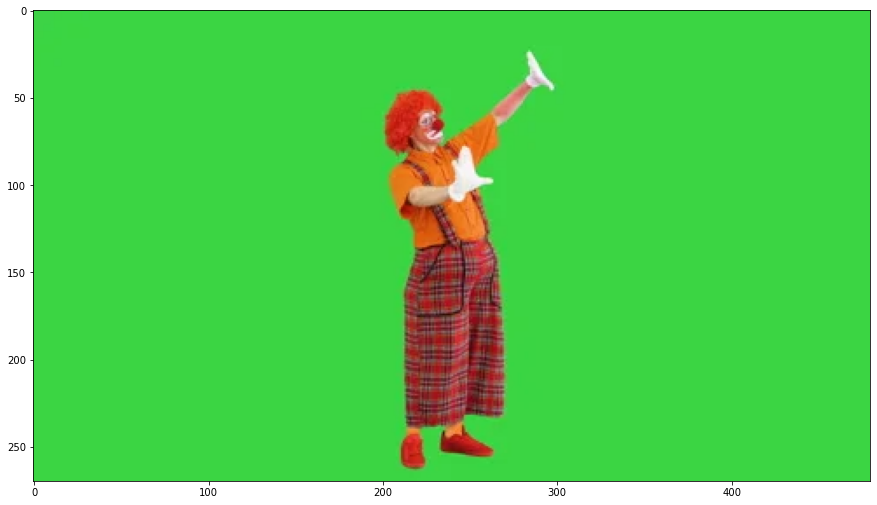

In [14]:
imshow(clown)

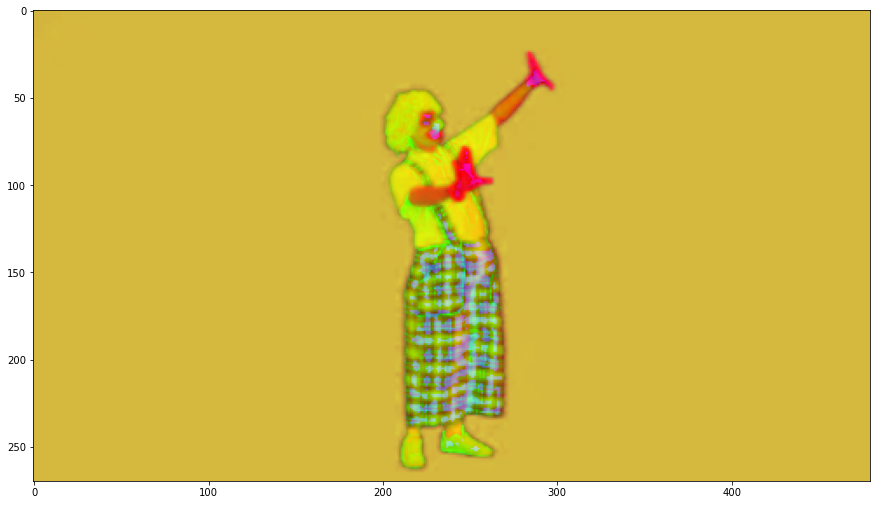

In [15]:
clown_hsv = cv2.cvtColor(clown, cv2.COLOR_BGR2HSV)
imshow(clown_hsv)

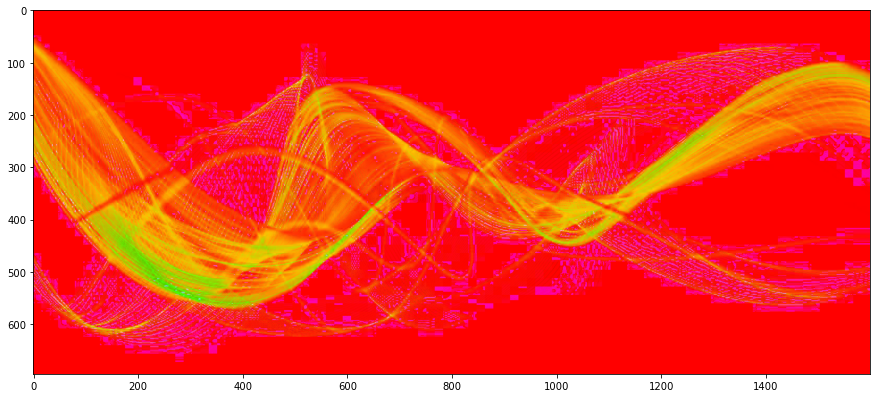

In [17]:
back_hsv = cv2.cvtColor(background, cv2.COLOR_BGR2HSV)
imshow(back_hsv)

In [22]:
background = cv2.resize(background, (1280, 720))
clown = cv2.resize(clown, (1280, 720))

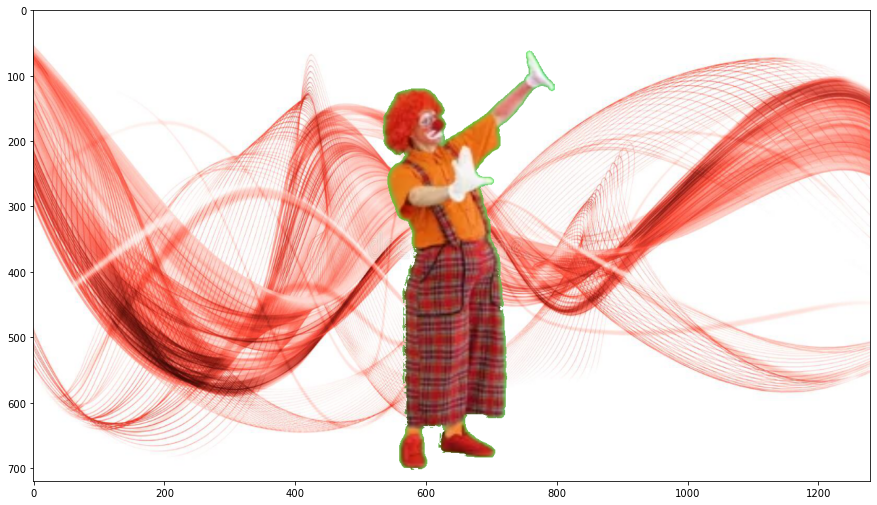

In [42]:
copy = clown.copy()
u_green = np.array([100, 255, 100]) 
l_green = np.array([0, 100, 0])
mask = cv2.inRange(copy, l_green, u_green)

masked_img = copy.copy()
masked_back = background.copy()

masked_img[mask != 0] = [0,0,0]
masked_back[mask == 0] = [0,0,0]

merged = masked_img + masked_back

imshow(merged)

In [47]:
def merge_green(object=str, background=str, image_path=str):
    object = cv2.imread(object)
    background = cv2.imread(background)
    object1 = cv2.resize(object, (1280, 720))
    background1 = cv2.resize(background, (1280, 720))
    copy = object1.copy()
    u_green = np.array([100, 255, 100]) 
    l_green = np.array([0, 100, 0])
    mask = cv2.inRange(copy, l_green, u_green)

    masked_img = copy.copy()
    masked_back = background1.copy()

    masked_img[mask != 0] = [0,0,0]
    masked_back[mask == 0] = [0,0,0]

    merged = masked_img + masked_back
    cv2.imwrite(image_path, merged)
    imshow(merged)

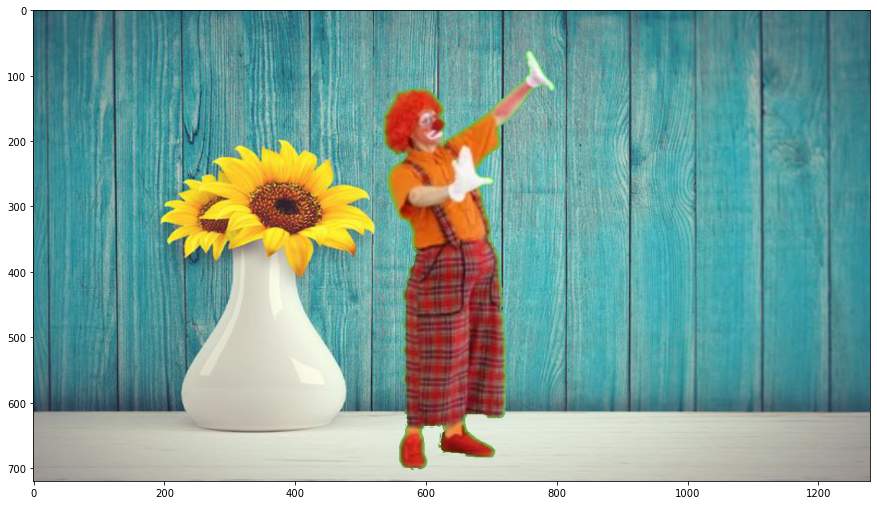

In [48]:
merge_green('/Users/szokirov/Documents/GitHub/opencv_projects/green_screen/clown-manipulating-virtual-objects-funny-footage-147079282_iconl.webp',
            '/Users/szokirov/Documents/GitHub/opencv_projects/green_screen/sunflowers-3292932__480.jpeg', 'mergedd.jpg')